In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from IPython.display import display
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.io as pio
pio.templates.default = 'plotly_white'
import logging
import logzero
logzero.loglevel(logging.INFO)
import numpy as np

# Overview

## Package structure

```
BITS
├── clustering
│   ├── base.py
│   ├── numeric.py
│   ├── seq.py
│   └── variant_matrix.py
├── plot
│   └── plotly.py
├── seq
│   ├── align.py
│   ├── cigar.py
│   ├── consed.py
│   ├── io.py
│   ├── plot.py
│   └── utils.py
└── util
    ├── interval.py
    ├── io.py
    ├── log.py
    ├── proc.py
    └── scheduler.py
```

## How to import BITS function & classes

To load a function/class you want to use, write as follows.

In [1]:
from BITS.util.proc import run_command

This imports `run_command` function from `BITS/util/proc.py` in the list above. Below is the list and examples of the functions and classes BITS offers.

# Functions/classes detail

## `BITS.clustering`

In this module, first `base.py` offers `Clustering` class, a root class of the remaining clustering classes. Actual classes used by a user are `ClusteringNumeric` in `numeric.py` and `ClusteringSeq` in `seq.py` for clustering of numerical data and sequence data, respectively.

Variables of the root class `Clustering` are as follows. Input `data` must be an array-like object.

In [ ]:
class Clustering:
    """Base class of clustering, offering basic and common variables and operations for clustering."""
    data        : Any   # array-like (List, pd.Series, np.ndarray((N, L))) data
    names       : List[str]  = None   # of each data; displayed in plots
    N           : int        = field(init=False)   # number of data; = len(data) or data.shape[0]
    L           : int        = field(init=False, default=None)   # number of features; = data.shape[1]
    assignments : np.ndarray = field(init=False)   # cluster assignment for each data; int type of length N
    s_dist_mat  : np.ndarray = field(init=False, default=None)   # square distance matrix
    c_dist_mat  : np.ndarray = field(init=False, default=None)   # condensed distance matrix
    cache       : dict       = field(default_factory=dict)   # store large intermediate data

**NOTE: below are too short to explain about the classes. More details are to be enriched in the future.**

### `numeric.py`

#### `ClusteringNumeric`

Input `data` must be two-dimensional array-like (i.e. vector of feature vectors) object which has `shape` variable.

In [5]:
from BITS.clustering.numeric import ClusteringNumeric

In [6]:
data = np.array([[1, 3, 5], [2, 2, 3], [5, 3, 1]])
c = ClusteringNumeric(data)

In [7]:
c.calc_dist_mat()

In [8]:
c.plot_dist_mat()

In [9]:
c.plot_tsne()

### `seq.py`

#### `ClusteringSeq`

In [10]:
from BITS.clustering.seq import ClusteringSeq

In [11]:
data = ["acacag", "acacgg", "aaaaaacgg"]
c = ClusteringSeq(data)

In [12]:
c.calc_dist_mat()

[I 190823 22:37:28 log:17] Starting distance matrix calculation 
[I 190823 22:37:28 log:19] Finished distance matrix calculation


In [13]:
c.plot_dist_mat()

## `BITS.plot`

This module offers wrapper functions of Plotly for the simplicity of writing codes.

### `plotly.py`

In [14]:
from BITS.plot.plotly import make_hist, make_scatter, make_layout, show_plot

Plot an interactive figure using Plotly is often bothersome, especially when you want to just draw a quite simple one. Using BITS, you can plot a simple interactive figure with very short code. Here is an example of a histogram. All you have to do is, like original Plotly, 1) create a (list of) trace object, 2) create a layout, and 3) plot.

In [15]:
data = [1, 5, 5, 4, 3, 4, 5]
trace_hist = make_hist(data, bin_size=1)

In [16]:
layout = make_layout(500, 300)

In [17]:
show_plot([trace_hist], layout)

Below is another example of a simple Scatter plot.

In [18]:
data_x = list(range(5))
data_y = list(range(5, 10))
text = list(range(10, 15))   # texts shown on the data points when hovering over the points; this is not mandatory

show_plot([make_scatter(data_x, data_y, text)], make_layout(500, 500))

`make_line` is a function for making a (non-interactive) line object. You have to pass the return value to the `Layout` object as follows.

In [19]:
from BITS.plot.plotly import make_line

In [20]:
shape = make_line(0, 0, 1, 1)
shape

{'type': 'line',
 'xref': 'x',
 'yref': 'y',
 'x0': 0,
 'y0': 0,
 'x1': 1,
 'y1': 1,
 'line': {'color': 'black', 'width': 1},
 'layer': 'below'}

In [21]:
show_plot([make_scatter(data_x, data_y, text)], make_layout(500, 500, shapes=[shape]))

## `BITS.seq`

Some utilities for sequence manipulations and operations are defined in this module.

### `align.py`

#### `EdlibRunner`

In [21]:
from BITS.seq.align import EdlibRunner

First you define an instance object of `EdlibRunner` while specifying options.

In [22]:
r = EdlibRunner("global", revcomp=True, cyclic=False)

For other options and detailed description, use `??` of Jupyter Notebook.

You can calculate alignment between two strings using `edlib` library:

In [23]:
alignment = r.align("ACGTTTAGAT", "AGGTTCGAGAT")
alignment

q[None:None] vs t[0:11]   (11 bp, 0.273 %diff)

The return value of `run_edlib()` is a class `Align`, which is also defined in `BITS.run`. You can confirm the attributes in the class instance object by:

In [24]:
alignment.__dict__

{'q_start': None,
 'q_end': None,
 't_start': 0,
 't_end': 11,
 'strand': 0,
 'length': 11,
 'diff': 0.2727272727272727,
 'cigar': <BITS.seq.cigar.Cigar at 0x2b10ff7c6198>}

You can of course access the attributes like:

In [25]:
alignment.diff

0.2727272727272727

### `cigar.py`

This module offers a class for CIGAR string and its manipulations.

#### `Cigar`, `FlattenCigar`

In [26]:
from BITS.seq.cigar import Cigar, FlattenCigar

In [27]:
cigar = Cigar("3D10=1I5=1X4=")
cigar

CIGAR string will be stored as an instance variable:

In [28]:
cigar.string

'3D10=1I5=1X4='

You can iterate CIGAR by:

In [29]:
for c in cigar:
    print(c)

(3, 'D')
(10, '=')
(1, 'I')
(5, '=')
(1, 'X')
(4, '=')


You can get alignment length (= the number of all operations in the CIGAR) by:

In [30]:
cigar.alignment_len

24

You can reverse CIGAR, which is useful for reverse complement of the same sequence, by:

In [31]:
cigar.reverse()

'4=1X5=1I10=3D'

You can "flatten" CIGAR as follows. Sometimes this form is much easier to handle:

In [32]:
cigar.flatten().string

'DDD==========I=====X===='

Also you can "unflatten" flatten CIGAR, returing to the original CIGAR string.

In [33]:
cigar.flatten().unflatten().string

'3D10=1I5=1X4='

### `consed.py`

#### `ConsedRunner`

A python wrapper of Consed, private software.

In [34]:
from BITS.seq.consed import ConsedRunner

In [35]:
r = ConsedRunner()

In [36]:
r.run(["acgt", "acga", "acgat"])

### `io.py`

#### `load_fasta`, `save_fasta`

In [46]:
from BITS.seq.io import load_fasta, save_fasta

Suppose you have a fasta file like:

In [38]:
!(cat sample.fasta)

>sample1
AAAAAAAAAAAAAAAAAAAAAAAAAAAA
>sample2
CCCCCCCCCCCCCCCCCCCCCC
GGGGGGGGG
TTTTTTTTTTTTTTTTTTTTTTTTT
>sample3
ACTACTAGCTGATCG

Then you can load this as a dictionary by:

In [39]:
seqs = load_fasta("sample.fasta")
seqs

{'sample1': 'AAAAAAAAAAAAAAAAAAAAAAAAAAAA',
 'sample2': 'CCCCCCCCCCCCCCCCCCCCCCGGGGGGGGGTTTTTTTTTTTTTTTTTTTTTTTTT',
 'sample3': 'ACTACTAGCTGATCG'}

This operation above is internally using the BioPython's function, so any type of fasta can be loaded as you expect.

You can also save a fasta by:

In [40]:
save_fasta(seqs, "sample.out.fasta")

In [41]:
!(cat sample.out.fasta)

>sample1
AAAAAAAAAAAAAAAAAAAAAAAAAAAA
>sample2
CCCCCCCCCCCCCCCCCCCCCCGGGGGGGGGTTTTTTTTTTTTTTTTTTTTTTTTT
>sample3
ACTACTAGCTGATCG


Be careful that the input `seqs` must be a dictionary of headers and sequences like above. You can specify the maximum file width by the optional argument `width` (`width=-1` by default means single-line fasta). Also you can set `sort=True` (default) option and then the sequences will be sorted according to their names.

### `plot.py`

#### `DotPlot`

In [47]:
from BITS.seq.plot import DotPlot

You can plot a dot plot between two sequences with a class `DotPlot`. To use this, [Gepard](http://cube.univie.ac.at/gepard) must be installed in advance. First you have to specify some names like:

(**NOTE: change `/path/to/` of `gepard_root` below as yours.**)

In [56]:
out_dir = "tmp"   # Name of an arbitray directory for temporary storage of Gepard input and output. Change as you like.
gepard_root = "/path/to/gepard"   # Change to the directory in which you installed Gepard.
gepard_jar = f"{gepard_root}/dist/Gepard-1.40.jar"
gepard_mat = f"{gepard_root}/resources/matrices/edna.mat"
gepard_command = f"java -cp {gepard_jar} org.gepard.client.cmdline.CommandLine -matrix {gepard_mat}"

And make an instance of `DotPlot` class using these variables:

In [57]:
d = DotPlot(gepard_command, out_dir)

Then you can plot a dot plot of any two strings by (though the example below is very nonsense due to the sequence contents):

AAAAAAAAAAAAAAAAAAAAAAAAAAAA vs CCCCCCCCCCCCCCCCCCCCCCGGGGGGGGGTTTTTTTTTTTTTTTTTTTTTTTTT


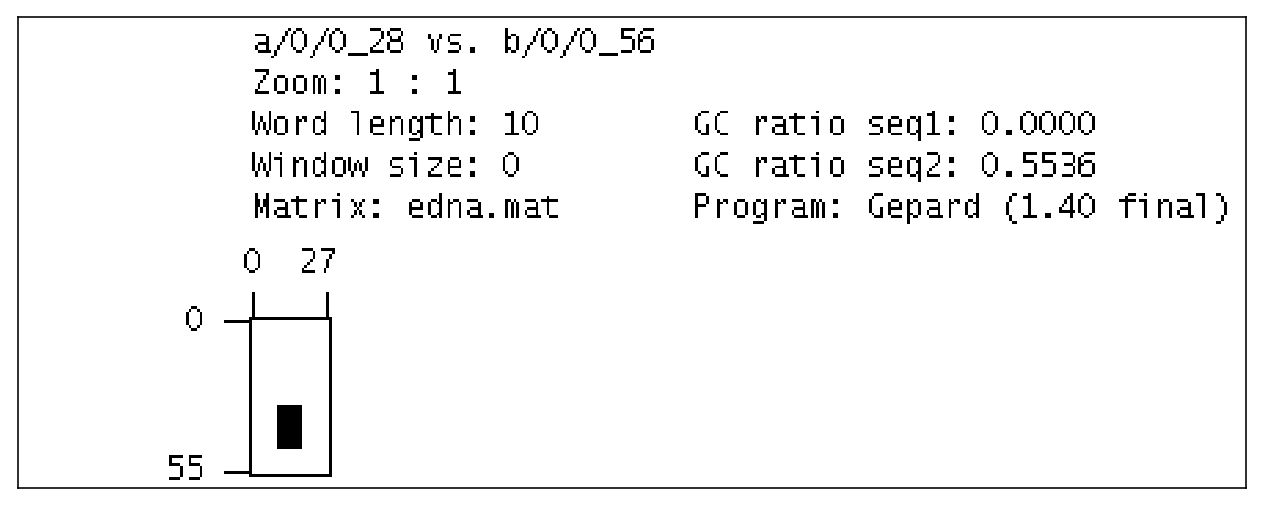

In [58]:
seq_a = seqs["sample1"]
seq_b = seqs["sample2"]
print(f"{seq_a} vs {seq_b}")
d.plot(seq_a, seq_b)

### `utils.py`

#### `revcomp`

In [59]:
from BITS.seq.utils import revcomp

In [60]:
revcomp("accac")

'gtggt'

#### `compress_homopolymer`

In [61]:
from BITS.seq.utils import compress_homopolymer

In [62]:
compress_homopolymer("aaacacttctcctaccc")

'acactctctac'

#### `split_seq`

In [63]:
from BITS.seq.utils import split_seq

In [64]:
split_seq("actacatcgatcgtaactaaacacccctctctacgatagtcgaacgta", width=10)

['actacatcga', 'tcgtaactaa', 'acacccctct', 'ctacgatagt', 'cgaacgta']

## `BITS.util`

Remaining utilities are put together in this module.

### `interval.py`

Below are utility functions for the `pyinterval` module:

In [65]:
from interval import interval

#### `interval_len`

In [66]:
from BITS.util.interval import intvl_len

In [67]:
intvl_len(interval([1, 2], [4, 5]))

4.0

This returns **the number of integers** contained in the given interval.

#### `subtract_intvl`

In [68]:
from BITS.util.interval import subtract_intvl

In [69]:
subtract_intvl(interval([1, 5], [8, 10]), interval([2, 3], [5, 9]))

interval([1.0], [4.0, 5.0], [10.0])

And this calculates the subtraction of the second interval from the first interval **as integer intervals**.

### `io.py`

#### `save_pickle`, `load_pickle`

In [70]:
from BITS.util.io import save_pickle, load_pickle

You can save a pickle object easily by:

In [71]:
obj = (1, 4, 9)
save_pickle(obj, "sample.pkl")

And load a pickle object by:

In [72]:
obj = load_pickle("sample.pkl")

### `log.py`

#### `print_log`

In [73]:
from BITS.util.log import print_log

`print_log()` is a simple decorator to write a log message when a function starts and ends. This requires `logzero` python module to output log messages. For example you can use it as:

In [74]:
@print_log("Awesome function")
def do_something(arg, **other_args):
    print("Doing something")
    return

In [75]:
do_something(1, additional=2)

[I 190823 20:29:08 log:17] Starting Awesome function 
[I 190823 20:29:08 log:19] Finished Awesome function


Doing something


### `proc.py`

#### `run_command`

In [76]:
from BITS.util.proc import run_command

You can execute a shell command easily by:

In [78]:
run_command("echo something")

'something\n'

Note that the return value of `run_command()` is a single string of the standard output.

#### `NoDaemonPool`

In [79]:
from BITS.util.proc import NoDaemonPool

You can create a non-daemonic `Pool` object of the `multiprocessing` mudule using `NoDaemonPool`. A non-daemonic process can have child processes, although the original (daemonic) process cannot. You can use it completely same as original `Pool`:

In [80]:
def return_itself(arg):
    return arg

In [81]:
n_core = 2   # Number of cores to be used for the parallel computation
with NoDaemonPool(n_core) as pool:
    for ret in pool.map(return_itself, range(5)):
        print(ret)

0
1
2
3
4


### `scheduler.py`

#### `Scheduler`

In [82]:
from BITS.util.scheduler import Scheduler

First you create an instance object of `Scheduler` by specifying the name of the job scheduler you want to use (only `"sge"` and `"slurm"` are supported) and the command for submitting a job (e.g. `"qsub"` for SGE and `"sbatch"` for SLURM).

In [ ]:
s = Scheduler("sge", "qsub")

Then you can submit a job by passing a script (string) and options using `submit()` method.

In [ ]:
script = "echo something"
s.submit(script, "out")

For more detail, use `?` and `??` of Jupyter Notebook.